<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Data-Science-Core-Independent-Project-Wk-9/blob/main/Moringa_Data_Science_Core_Independent_Project_Wk_9_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**
The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 passengers and crew.

#**Defining the question**
Our research question is to predict whether a person survived the disaster or not using the different variables in the train dataset provided  <a href=https://archive.org/download/train5_202002/train%20%285%29.csv>here</a> and the test dataset provided <a href=https://archive.org/download/test1_202002/test%20%281%29.csv>here</a> 

#**Metric of success**
Our model will be considered successful if it is able to predict whether a person survived or not with a high accuracy level



#**Context**
The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. Using different statistical techniques and machine learning, we want to get as much information as possible from the data and formulate a model that will make predictions on whether a person survived the disaster or not.

#**Experimental Design**
The approach to be used for this project is shown below;
* Downloading the datasets
* Reading the datasets
* Checking the datasets
* Tidying the datasets
* Exploratory Analysis
* Implementing the solution
* Challenging the solution
* Conclusion and recommendations



#**Reading the data**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#reading the train data
#previewing the first 5 rows of the dataset
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#reading the test data
#previewing the first 5 rows of the dataset
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#previewing the last 5 rows of the dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#previewing the last 5 rows of the dataset
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


#**Checking the data**

In [6]:
#checking the shape of the train dataset
train.shape

(891, 12)

In [7]:
#checking the shape of the test dataset
test.shape

(418, 11)

In [8]:
#checking the columns of the train dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#checking the columns of the test dataset
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#Checking the datatypes of the train dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
#changing the data types of categorical variables to categorical
train = train.astype({'Survived': 'category'})
train.dtypes

PassengerId       int64
Survived       category
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [12]:
#checking thedatatypes of the test dataset
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
#checking the information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


In [14]:
#checking the informatio of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
#checking the unique values in the pclass column
train['Pclass'].unique()

array([3, 1, 2])

In [16]:
#checking the unique values in the parch column
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [17]:
#checking the unique values in the pclass column
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [18]:
#checking the description of the train dataset
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
#Checking the description of the test dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#**External data source validation**

#**Tidying and cleaning the train dataset**

**Data Uniformity**

In [20]:
#checking the columns of the train dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [21]:
#changing the column names to lower case
train.columns = train.columns.str.lower()
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#Checking if the columns have been changed to lower case
print(train.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


**Data completeness**

In [23]:
#checking for null values in the train dataset
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

We can observe that the cabin column has a lot of null values 

In [24]:
#dealing with missing values in the Age column
#replacing the missing values in the age column with the mean age
#checking whether the null values have been replaced
train['age'] = train['age'].fillna(train['age'].mean())
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [25]:
#dropping the cabin column since it has so many missing values
#dropping unnecessary columns
train = train.drop(['cabin','name', 'ticket', 'passengerid'], axis = 1)


**Data Consistency**

In [26]:
#Checking for duplicates in the train dataset
#Dropping duplicates
train.duplicated().sum()
train = train.drop_duplicates()
train.shape

(780, 8)

In [27]:
# Checking for any anomalies in the qualitative variables

qcol = ['sex', 'embarked']

for col in qcol:
  print(col, ':', train[col].unique())

sex : ['male' 'female']
embarked : ['S' 'C' 'Q' nan]


In [29]:
#dealing with the nan values in the embarked column
#Dealing with missing values in the sex column
#checking if the mising values have all been replaced
train['embarked'].fillna(method='ffill', inplace=True)
train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

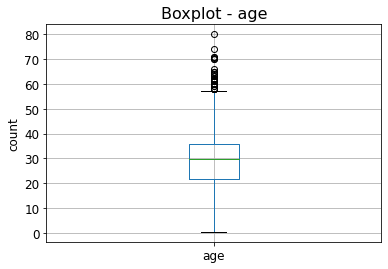

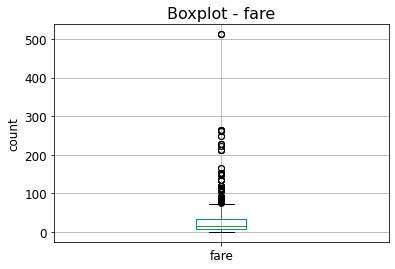

In [30]:
#Checking for Outliers
cols = ['age', 'fare']

for column in cols:
    plt.figure()
    train.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

The outliers will not be dropped since a lot of data will be lost

#**Tidying and cleaning the test dataset**

**Data Uniformity**

In [31]:
#changing the column names to lower case
test.columns = test.columns.str.lower()
test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Completeness**

In [32]:
#checking for null values in the test dataset
test.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [33]:
#dealing with missing values in the Age column
#replacing the missing values in the age column with the mean age
#replacing the missing values in the fare column with the mean fare
#checking whether the null values have been replaced
test['age'] = test['age'].fillna(test['age'].mean())
test['fare'] = test['fare'].fillna(test['fare'].mean())
#dropping the cabin column since it has so many missing values
test = test.drop(['cabin'], axis = 1)
#checking whether the null values have been replaced
test.isnull().sum()

passengerid    0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

In [34]:
#dropping unneccesary columns
test = test.drop(['name', 'ticket', 'passengerid'], axis = 1)

**Data Consistency**

In [35]:
#Checking for duplicates in the test dataset
test.duplicated().sum()

38

In [36]:
# Checking for any anomalies in the qualitative variables

qcol = ['sex', 'embarked']

for col in qcol:
  print(col, ':', train[col].unique())

sex : ['male' 'female']
embarked : ['S' 'C' 'Q']


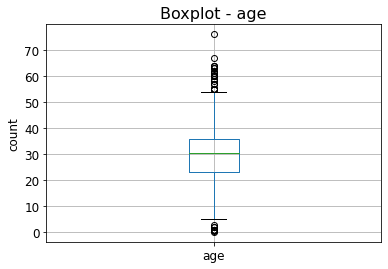

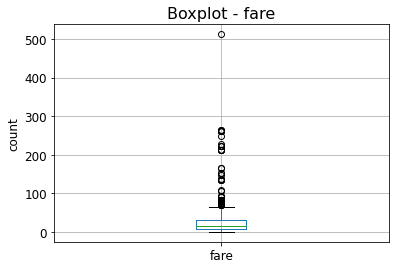

In [37]:
#Checking for Outliers
cols = ['age', 'fare']

for column in cols:
    plt.figure()
    test.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)


Outliers will not be dropped since a lot of data will be lost

#**Exploratory Analysis**

##**Univariate Analysis**

(array([ 53.,  46., 163., 259., 112.,  69.,  44.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

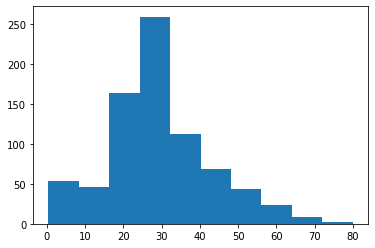

In [38]:
#A histogram representing the age column
plt.hist(train['age'])

(array([ 16.,  16.,  71., 183.,  43.,  37.,  25.,  17.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <a list of 10 Patch objects>)

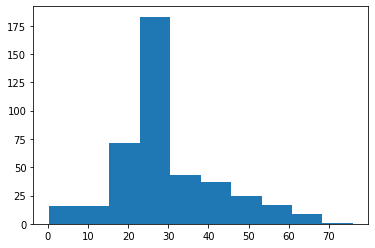

In [39]:
#A histogram representing the age column
plt.hist(test['age'])

We can see that the age columns from both the train and test dataset are a little bit skewed to the right. This could be due to the outliers that we did not drop.

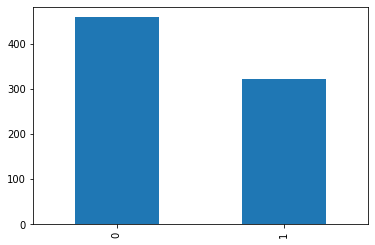

In [40]:
#A bar chart representing the sibsp column
train['survived'].value_counts().plot.bar()

Most people did not survive based on our observations from the bar graph above.

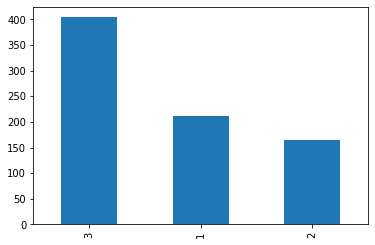

In [41]:
#A bar chart representing the pclass column
train['pclass'].value_counts().plot.bar()

Most people had boarded third class followed by 1st class and lastly 2nd class.

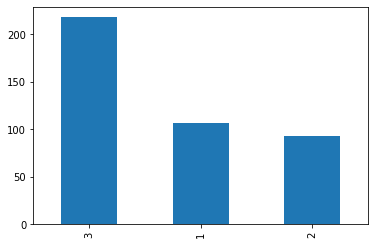

In [42]:
#A bar chart representing the pclass column
test['pclass'].value_counts().plot.bar()

Most people had boarded third class followed by 1st class and lastly 2nd class.

([<matplotlib.patches.Wedge at 0x7f860b55be10>,
 [Text(-1.015417665786541, -0.4229975933839491, 'male'),
  Text(1.0154176261826435, 0.42299768845421065, 'female')],
 [Text(-0.5538641813381132, -0.23072596002760856, '62.564'),
  Text(0.5538641597359873, 0.23072601188411485, '37.436')])

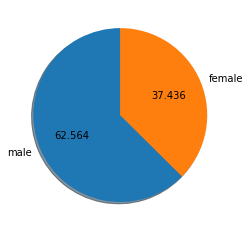

In [43]:
#A pie chart representing the sex column
plt.pie(train['sex'].value_counts(),startangle = 90, autopct = '%.3f',
        labels = ['male', 'female'],shadow = True)

Most of the people who were in the ship were male

([<matplotlib.patches.Wedge at 0x7f860a4f4cd0>,
 [Text(-1.000595210447554, -0.45695648023571733, 'male'),
  Text(1.000595210447554, 0.4569564802357172, 'female')],
 [Text(-0.5457792056986657, -0.24924898921948216, '63.636'),
  Text(0.5457792056986657, 0.2492489892194821, '36.364')])

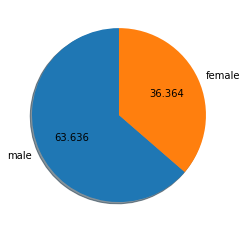

In [44]:
#A pie chart representing the sex column
plt.pie(test['sex'].value_counts(),startangle = 90, autopct = '%.3f',
        labels = ['male', 'female'],shadow = True)

Most of the people who were in the ship were male

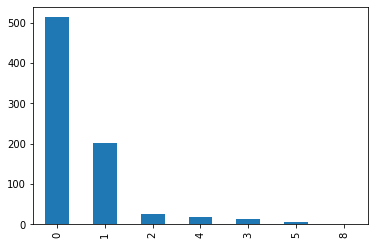

In [45]:
#A bar chart representing the sibsp column
train['sibsp'].value_counts().plot.bar()

Most people in the ship had no sibling or spouse.

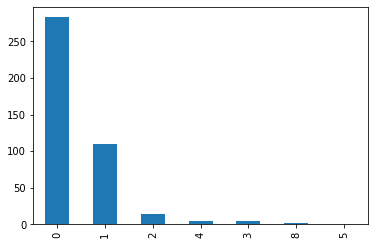

In [46]:
#A bar chart representing the sibsp column
test['sibsp'].value_counts().plot.bar()

Most people in the ship had no sibling or spouse.

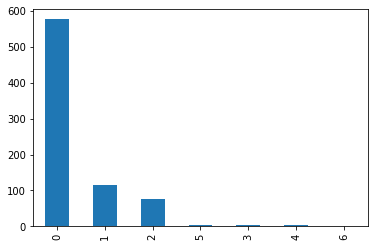

In [47]:
#A bar chart representing the parch column
train['parch'].value_counts().plot.bar()

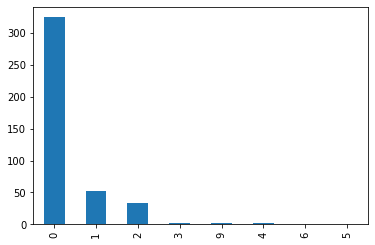

In [48]:
#A bar chart representing the parch column
test['parch'].value_counts().plot.bar()

Most of the people on board had no parent or child

(array([629.,  98.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

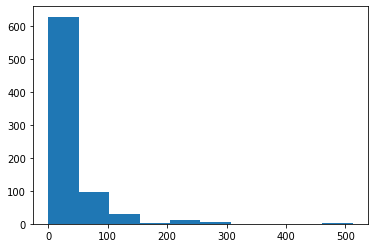

In [49]:
#A histogram representing the fare column
plt.hist(train['fare'])

(array([339.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

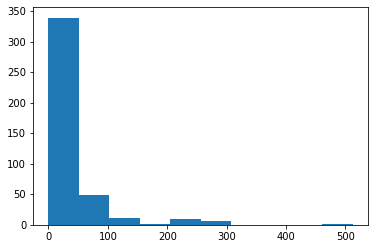

In [50]:
#A histogram representing the fare column
plt.hist(test['fare'])

Most of the people paid fare of between 0 and 50

([<matplotlib.patches.Wedge at 0x7f860a16d510>,
 [Text(-0.8378835355731241, -0.7127069389415833, 'S'),
  Text(0.9821105947662617, 0.4954379675073964, 'C'),
  Text(0.25894335663592627, 1.0690876194466568, 'Q')],
 [Text(-0.45702738303988577, -0.38874923942268175, '72.436'),
  Text(0.5356966880543245, 0.2702388913676707, '20.000'),
  Text(0.1412418308923234, 0.5831387015163582, '7.564')])

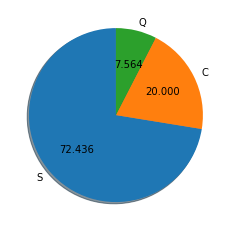

In [51]:
#A pie chart representing the embarked column
plt.pie(train['embarked'].value_counts(),startangle = 90, autopct = '%.3f',
        labels = ['S', 'C', 'Q'],shadow = True)

Most people embarked at location S

([<matplotlib.patches.Wedge at 0x7f860a0ca150>,
 [Text(-0.9864075838127551, -0.48682653850902863, 'S'),
  Text(1.0930171429468365, 0.1237478291701925, 'C'),
  Text(0.3727671834231357, 1.0349128595987116, 'Q')],
 [Text(-0.5380405002615027, -0.2655417482776519, '64.593'),
  Text(0.5961911688800925, 0.06749881591101409, '24.402'),
  Text(0.20332755459443763, 0.564497923417479, '11.005')])

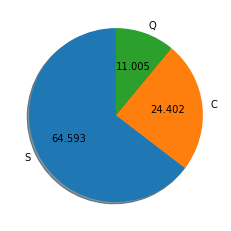

In [52]:
#A pie chart representing the embarked column
plt.pie(test['embarked'].value_counts(),startangle = 90, autopct = '%.3f',
        labels = ['S', 'C', 'Q'],shadow = True)

In [ ]:
Most people embarked at location S

###**Measures of central tendency and dispersion**

In [53]:
#checking the measures of central tendency
train.describe()

,pclass,age,sibsp,parch,fare
count,780.000000,780.000000,780.000000,780.000000,780.000000
mean,2.246154,29.797600,0.525641,0.417949,34.829108
std,0.854452,13.708883,0.988046,0.838536,52.263440
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,21.750000,0.000000,0.000000,8.050000
50%,3.000000,29.699118,0.000000,0.000000,15.950000
75%,3.000000,36.000000,1.000000,1.000000,34.375000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
#checking the measures of central tendency
test.describe()

,pclass,age,sibsp,parch,fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,12.634534,0.896760,0.981429,55.840500
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [55]:
#checking the skewness of different variables in the dataset
train.skew()

pclass   -0.494364
age       0.397400
sibsp     3.046805
parch     2.624282
fare      4.561010
dtype: float64

In [56]:
#checking the skewness of different variables in the dataset
test.skew()

pclass   -0.534170
age       0.512711
sibsp     4.168337
parch     4.654462
fare      3.691600
dtype: float64

In [57]:
#checking the kurtosis of different variables in the dataset
train.kurt()

pclass    -1.452747
age        0.577506
sibsp     12.693940
parch      8.909622
fare      30.075101
dtype: float64

In [58]:
#checking the kurtosis of different variables in the dataset
test.kurt()

pclass    -1.382666
age        0.883176
sibsp     26.498712
parch     31.412513
fare      17.971266
dtype: float64

##**Bivariate Analysis** 

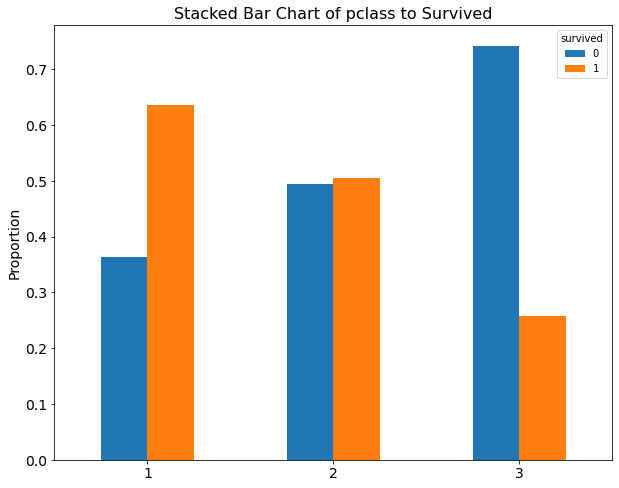

In [59]:
# Comparison of pclass and Survived

table=pd.crosstab(train['pclass'],train['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of pclass to Survived', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

First  class had more survivers compared to second class and third class. This shows that there was a high chance that a person in first class would survive compared to the other classes.

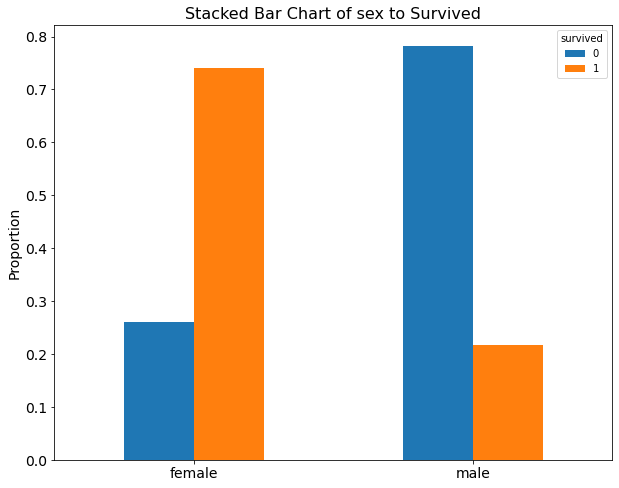

In [60]:
# Comparison of sex and Survived

table=pd.crosstab(train['sex'],train['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of sex to Survived', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

More females survived compared to male

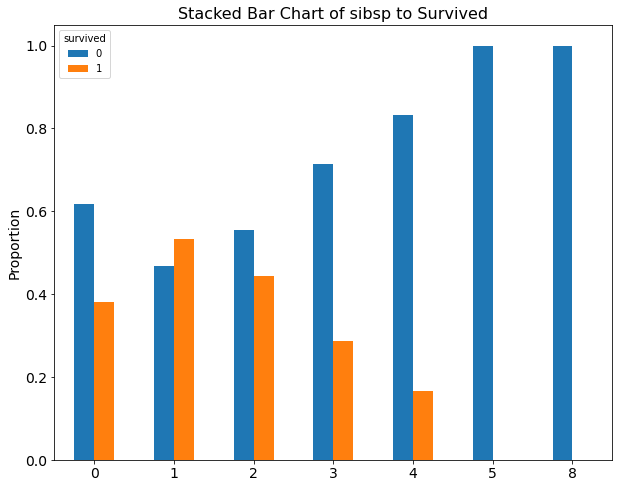

In [61]:
# Comparison of sibsp and Survived

table=pd.crosstab(train['sibsp'],train['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of sibsp to Survived', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Most people who survived are found to have had 1 sibling or spouse 

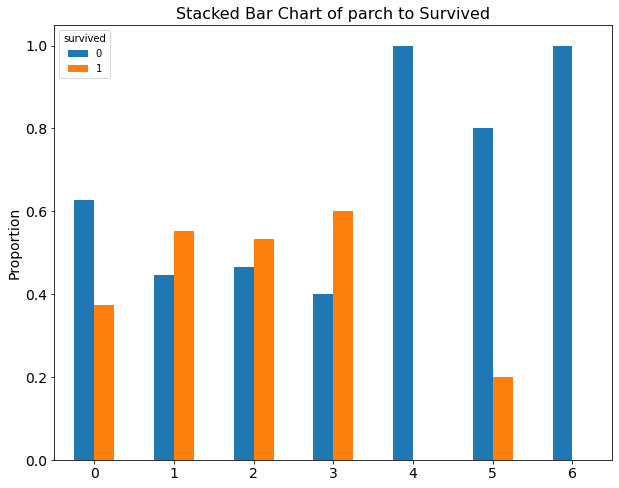

In [62]:
# Comparison of parch and Survived

table=pd.crosstab(train['parch'],train['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of parch to Survived', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Most survivors had 3 parents or children

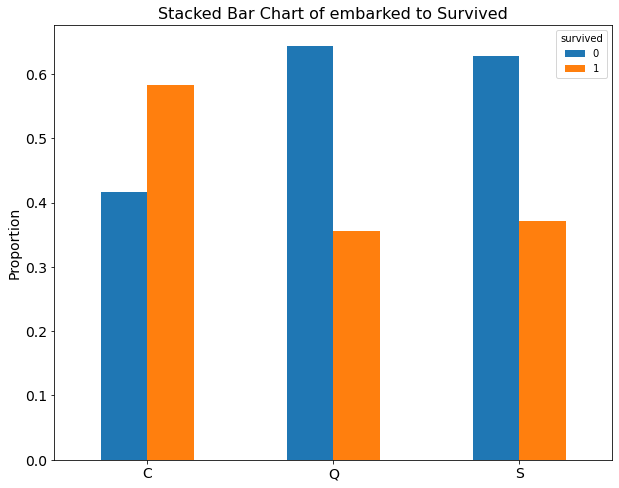

In [63]:
# Comparison of embarked and Survived

table=pd.crosstab(train['embarked'],train['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of embarked to Survived', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

most survivors embarked at location C 

In [64]:

# splitting age into categories to make it easier to analyze
conditions = [
    ((train.age >= 0) & (train.age <= 10)),
    ((train.age >= 11) & (train.age <= 20)),
    ((train.age >= 21) & (train.age <= 30)),
    ((train.age >= 31) & (train.age <= 40)),
    ((train.age >= 41) & (train.age <= 50)),
    ((train.age >= 51) & (train.age <= 60)),
    ((train.age >= 61) & (train.age <= 70)),
    ((train.age >= 71) & (train.age <= 80))
]
choices = ['1', '2', '3', '4', '5', '6', '7', '8']

train['age_range'] = np.select(conditions, choices)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8609420910>],
      dtype=object)

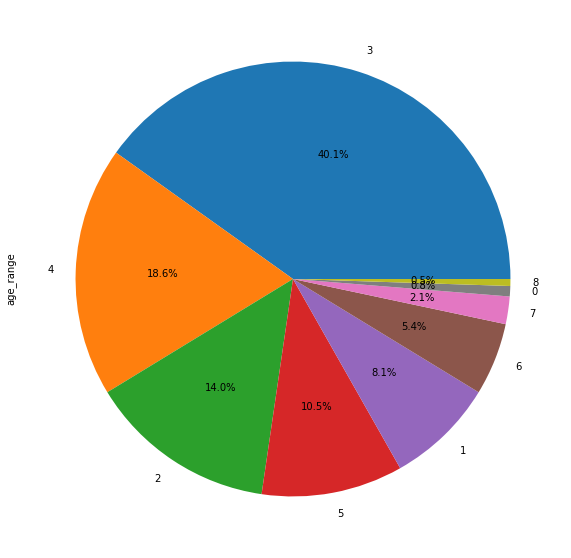

In [65]:
# plotting the age ranges in a pie chart
train.age_range.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = [12, 10], 
                                      subplots = True)

Most people who were on board were between 21 and 30 years of age.

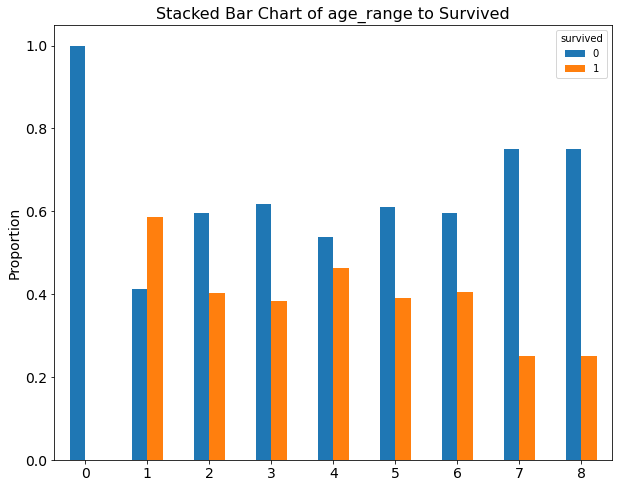

In [66]:
# Comparison of age_range and Survived

table=pd.crosstab(train['age_range'],train['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of age_range to Survived', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Most survivors were between the age of 11 and 20

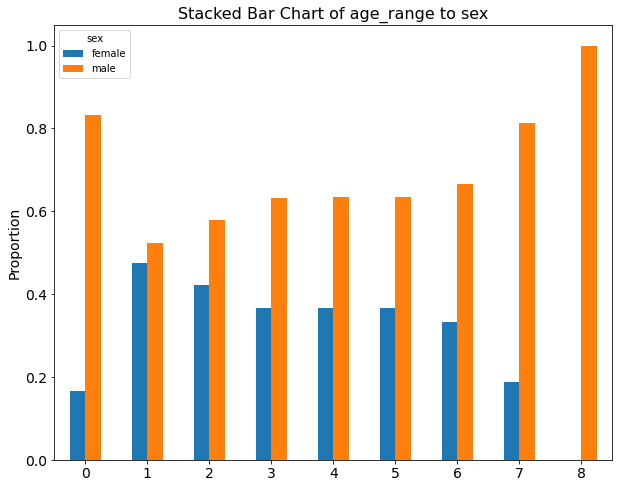

In [67]:
# Comparison of age_range and sex

table=pd.crosstab(train['age_range'],train['sex'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of age_range to sex', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Males were the highest across all age ranges

In [68]:
#checking the unique values in the fare column
train['fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [69]:
#dividing the fare column into different ranges for easier exploration
conditions = [
    ((train.fare >= 0) & (train.fare <= 50)),
    ((train.fare >= 51) & (train.fare <= 100)),
    ((train.fare >= 101) & (train.fare <= 200)),
    ((train.fare >= 201) & (train.fare <= 300)),
    ((train.fare >= 301) & (train.fare <= 515))
]
choices = ['1', '2', '3', '4', '5']

train['fare_range'] = np.select(conditions, choices)

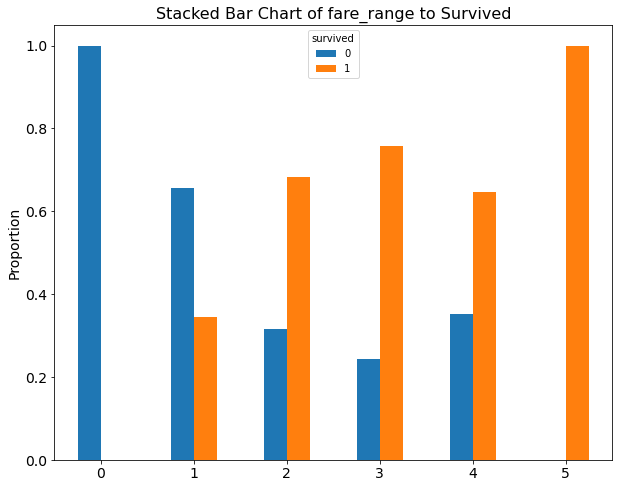

In [70]:
# Comparison of fare_range and Survived

table=pd.crosstab(train['fare_range'],train['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of fare_range to Survived', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Most people who paid fare between 0 and 50 did not survive

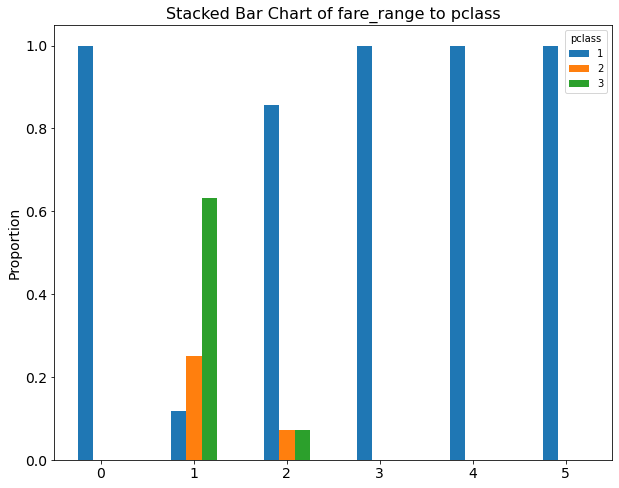

In [71]:
# Comparison of fare_range and pclass

table=pd.crosstab(train['fare_range'],train['pclass'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of fare_range to pclass', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [72]:
#checking how the variables are correlated to one another
train.corr()

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.338528,0.086788,0.038975,-0.552440
age,-0.338528,1.000000,-0.280010,-0.186999,0.090555
sibsp,0.086788,-0.280010,1.000000,0.380596,0.134127
parch,0.038975,-0.186999,0.380596,1.000000,0.191055
fare,-0.552440,0.090555,0.134127,0.191055,1.000000


In [73]:
#checking how the variables are correlated to one another
test.corr()

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.440782,0.001087,0.018721,-0.576619
age,-0.440782,1.000000,-0.079535,-0.045073,0.326800
sibsp,0.001087,-0.079535,1.000000,0.306895,0.171488
parch,0.018721,-0.045073,0.306895,1.000000,0.230001
fare,-0.576619,0.326800,0.171488,0.230001,1.000000


##**Multivariate analysis**

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text major ticklabel objects>)

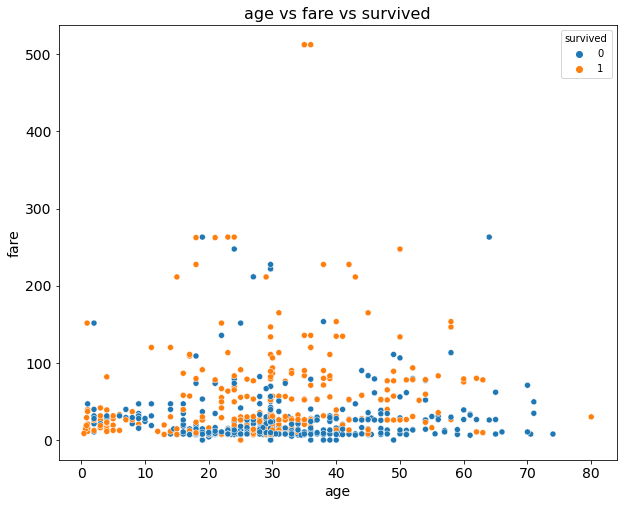

In [74]:
# Analysis of age, fare and survived

plt.figure(figsize=(10,8))
sns.scatterplot(x= train['age'], y=train['fare'], hue= train['survived'])
plt.title('age vs fare vs survived', fontsize = 16)
plt.xlabel('age', fontsize = 14)
plt.ylabel('fare', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [75]:
#checking the correlation matrix of the train dataset
corrmat = train.corr()
corrmat

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.338528,0.086788,0.038975,-0.552440
age,-0.338528,1.000000,-0.280010,-0.186999,0.090555
sibsp,0.086788,-0.280010,1.000000,0.380596,0.134127
parch,0.038975,-0.186999,0.380596,1.000000,0.191055
fare,-0.552440,0.090555,0.134127,0.191055,1.000000


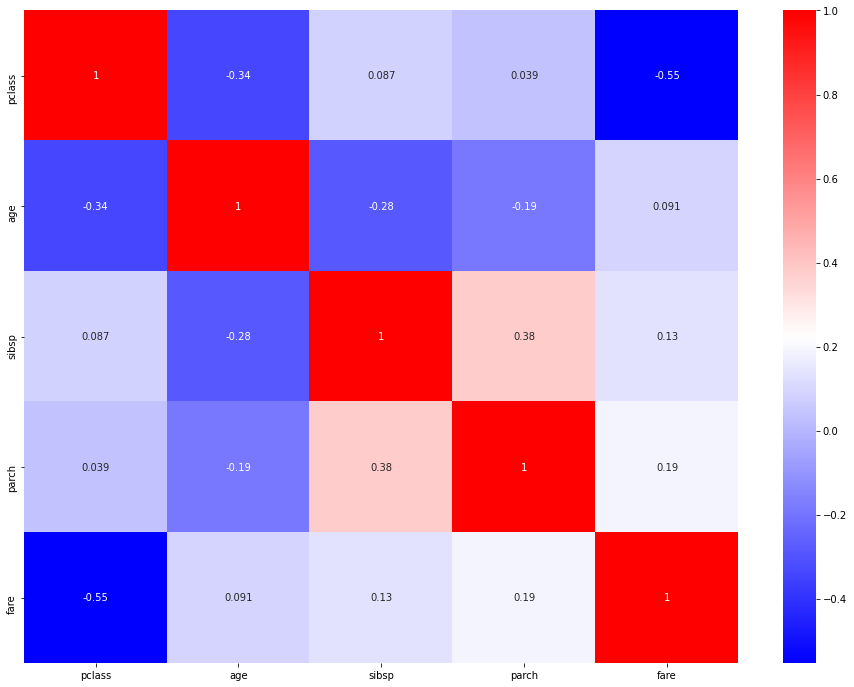

In [76]:
#A heat map representing the correlation of different variables in the train dataset
plt.figure(figsize=(16, 12))
sns.heatmap(train.corr(), cmap='bwr', annot=True)

###**Reduction(PCA)**

In [77]:
#Encoding the dataset
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col))
train[categorical_cols]

,sex,embarked,age_range,fare_range
0,1,2,3,1
1,0,0,4,2
2,0,2,3,1
3,0,2,4,2
4,1,2,4,1
...,...,...,...,...
885,0,1,4,1
887,0,2,2,1
888,0,2,3,1
889,1,0,3,1


In [78]:
#Encoding the dataset
# Categorical boolean mask
categorical_feature_mask = test.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = test.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
test[categorical_cols] = test[categorical_cols].apply(lambda col: le.fit_transform(col))
test[categorical_cols]

,sex,embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2
...,...,...
413,1,2
414,0,0
415,1,2
416,1,2


In [79]:
#Pre processing
X = train.drop(['survived'], axis = 1)
y = train['survived']

In [80]:
# Splitting into training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
# Normalization

# Dependents had an issue because of the +

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [83]:
# Obtaining the explained variance ratio which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio"

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.30986984, 0.239459  , 0.1287944 , 0.10407811, 0.0878827 ,
       0.06631048])

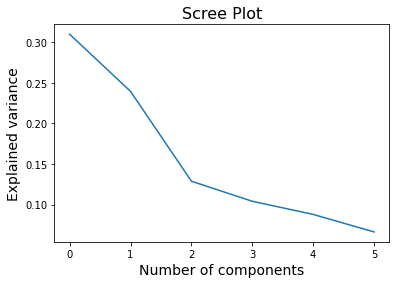

In [84]:
# Plotting our scree plot

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components', fontsize = 14)
plt.ylabel('Explained variance', fontsize = 14)
plt.title('Scree Plot', fontsize = 16)
plt.show()

The elbow of the scree plot is at 2 and so the optimal variables are 2.

In [107]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [108]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[200  27]
 [ 67  96]]
Accuracy 0.7589743589743589


The accuracy we get after reduction is 75%

#**Implementing the solution**

**KNN**

In [87]:
#splitting our train dataset into attributes and labels
X = train.drop(['survived'], axis = 1)
y = train['survived']

**80 - 20**

In [134]:
#dividing our data into training and test splitts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Feature scalling so that all features can be evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#importing the KNeighborsClassifier class from the sklearn.neighbors library
#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(5)
classifier.fit(X_train, y_train)

#making predictions on the test
y_pred1 = classifier.predict(X_test)

#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[75 27]
 [16 38]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       102
           1       0.58      0.70      0.64        54

    accuracy                           0.72       156
   macro avg       0.70      0.72      0.71       156
weighted avg       0.74      0.72      0.73       156



After increasing our test size to 0.2, the accuracy is at 72%. 

**Hyperparameter tuning**

In [116]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
classifier_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(classifier_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 22
Best p: 1
Best n_neighbors: 5


In [135]:
#fitting the best parameters to see if the accuracy improves
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=22, n_neighbors=5, p=1)
classifier.fit(X_train, y_train)
#making predictions on the test
y_pred1 = classifier.predict(X_test)
#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[74 28]
 [16 38]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       102
           1       0.58      0.70      0.63        54

    accuracy                           0.72       156
   macro avg       0.70      0.71      0.70       156
weighted avg       0.74      0.72      0.72       156



After hyperparameter tuning the accuracy remained 72%

**70 - 30**

In [126]:
#dividing our data into training and test splitts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#Feature scalling so that all features can be evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#importing the KNeighborsClassifier class from the sklearn.neighbors library
#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#making predictions on the test
y_pred2 = classifier.predict(X_test)

#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[112  26]
 [ 32  64]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       138
           1       0.71      0.67      0.69        96

    accuracy                           0.75       234
   macro avg       0.74      0.74      0.74       234
weighted avg       0.75      0.75      0.75       234



After increasing the test size to 0.3 the accuracy was at 75%

**Hyperparameter tuning**

In [121]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
classifier_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(classifier_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 22
Best p: 1
Best n_neighbors: 5


In [136]:
#fitting the best parameters to see if the accuracy improves
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=2, n_neighbors=19, p=1)
classifier.fit(X_train, y_train)
#making predictions on the test
y_pred = classifier.predict(X_test)
#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78 24]
 [16 38]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       102
           1       0.61      0.70      0.66        54

    accuracy                           0.74       156
   macro avg       0.72      0.73      0.73       156
weighted avg       0.75      0.74      0.75       156



After hyperparameter tuning the accuracy reduced to 74%

**60 - 40**

In [101]:
#dividing our data into training and test splitts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

#Feature scalling so that all features can be evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#importing the KNeighborsClassifier class from the sklearn.neighbors library
#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#making predictions on the test
y_pred = classifier.predict(X_test)

#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[150  29]
 [ 39  94]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       179
           1       0.76      0.71      0.73       133

    accuracy                           0.78       312
   macro avg       0.78      0.77      0.77       312
weighted avg       0.78      0.78      0.78       312



When we increased our test size to 0.4, our accuracy increased to 78%

**Hyperparameter tuning**

In [102]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
classifier_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(classifier_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 22
Best p: 1
Best n_neighbors: 5


In [138]:
#fitting the best parameters to see if the accuracy improves
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=22, n_neighbors=5, p=1)
classifier.fit(X_train, y_train)
#making predictions on the test
y_pred = classifier.predict(X_test)
#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74 28]
 [16 38]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       102
           1       0.58      0.70      0.63        54

    accuracy                           0.72       156
   macro avg       0.70      0.71      0.70       156
weighted avg       0.74      0.72      0.72       156



After hyperparameter tuning the accuracy reduced to 72%

Our best model in this case is when our model is 0.4 and the accuracy is at 78% which is not that bad.

#**Challenging the solution**
For a better accuracy to be achieved maybe we could have used the most optimal variables or even a different model.


#**Follow up questions**

**Did we have the right data?**

Yes we had the right data.


**Did we have enough data?**

No, we had missing values which would have caused the model to not be that accurate.


**Did we have the right question**
Yes we did.

Conclusions and recommendations
From our analysis and modelling, we found our model which had a test size of 0.4 to be the most accurate with an accuracy of 78%. We recommend that predictions to be made using this model since the chance of predicting the accurate values is very high.